In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn Pred.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Replacing blank in `TotalCharges` with `0` as `tenure` is `0` and no total charges are recorded

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [6]:
df.info() #before

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.info() #after

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Checking Duplicates

In [19]:
# every row wise
df.duplicated().sum()

0

In [23]:
# Checking on customer id
df['customerID'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: customerID, Length: 7043, dtype: bool

### Converting `0` or `1` values to `Yes` or `No` in `SeniorCitizen` Column

In [25]:
# defining a function for this purpose
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [27]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


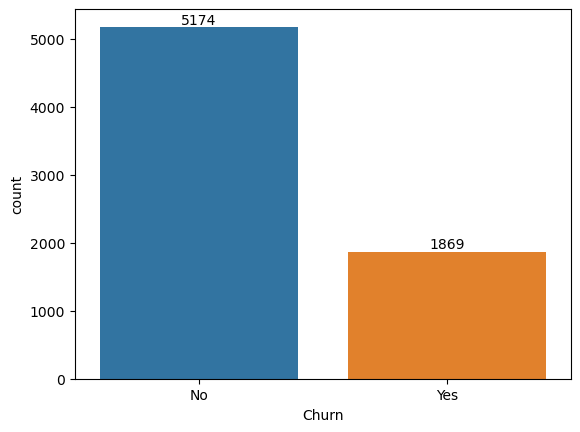

In [32]:
# sns.countplot(x = 'Churn', data = df)
# to get count 
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.show()

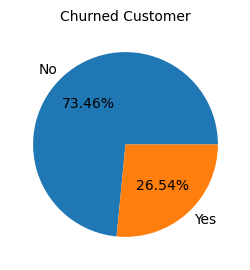

In [53]:
# Percentage -- Pie Chart
# ---> first we group by churn
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.figure(figsize = (3,3))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title('Churned Customer', fontsize = 10)
plt.show()

## Result:
26.54% customer became churned while 73.46% didn't.
### Now Reason behind it

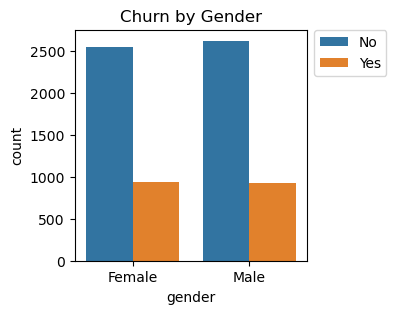

In [85]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title('Churn by Gender')
plt.legend(bbox_to_anchor = (1,1.03))
plt.show()

#### So `gender` doesn't affect the churning

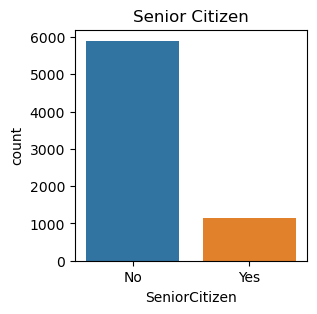

In [61]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'SeniorCitizen', data = df)
plt.title('Senior Citizen')
plt.show()

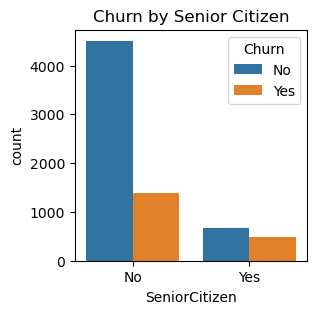

In [60]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'SeniorCitizen', data = df, hue = 'Churn')
plt.title('Churn by Senior Citizen')
plt.show()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_27408\169841944.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent = (height / total_all[senior]) * 100 if total_all[senior] > 0 else 0


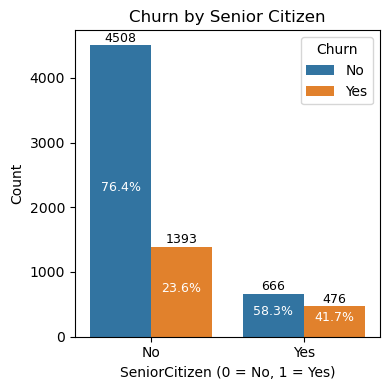

In [66]:
# Chatgpt code for percentage and count
# Create the plot
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')

# Calculate counts and percentages
total_per_group = df.groupby('SeniorCitizen')['Churn'].value_counts().unstack().fillna(0)
total_all = total_per_group.sum(axis=1)

# Add labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        category = bar.get_label()  # Get Churn category
        group = int(bar.get_x() + bar.get_width() / 2 + 0.5)  # 0 or 1

        # Get percent
        senior = int(bar.get_x() + bar.get_width() / 2 + 0.5)
        churn_label = bar.get_label()
        percent = (height / total_all[senior]) * 100 if total_all[senior] > 0 else 0

        # Show count above bar
        ax.text(x, height + 50, f'{int(height)}', ha='center', fontsize=9, color='black')
        # Show percent inside bar
        ax.text(x, height / 2, f'{percent:.1f}%', ha='center', fontsize=9, color='white')

# Final touches
plt.title('Churn by Senior Citizen')
plt.xlabel('SeniorCitizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


### Result -> Comparatively a great percentage of senior citizen category have churn.

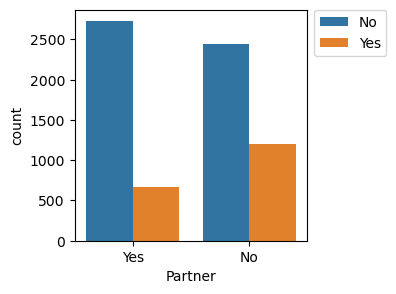

In [82]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'Partner', data = df, hue = 'Churn')
plt.legend(bbox_to_anchor = (1,1.03)) # anchor point outside the graph
plt.show()

### Now on the basis of Tenure 

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


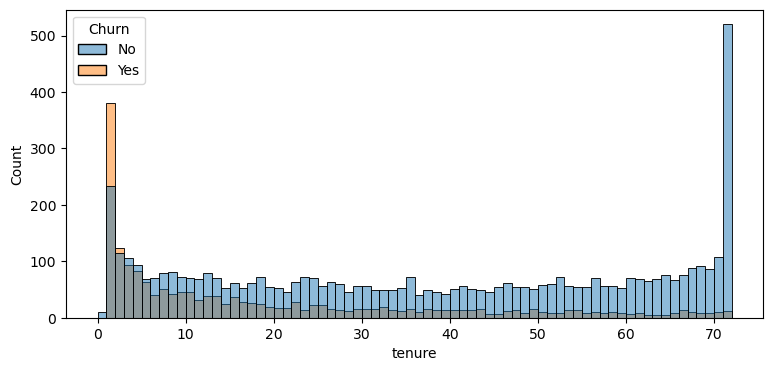

In [95]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

### Result = people who have used our services long time, have stayed and people who have used 1-2 month, churned.

So people have long term contract stayed.
### Now see the count and relation of contract.

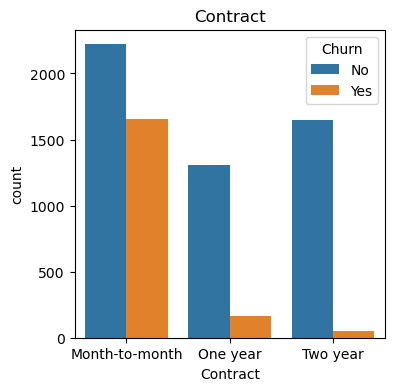

In [98]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'Contract', data = df, hue = 'Churn')
plt.title('Contract')
plt.show()

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='tenure_group', ylabel='count'>

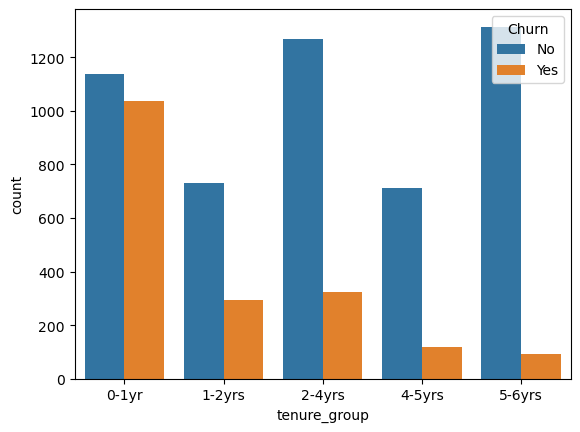

In [153]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], 
                            labels=['0-1yr','1-2yrs','2-4yrs','4-5yrs','5-6yrs'])
plt.figure(figsize = )
sns.countplot(x='tenure_group', hue='Churn', data=df)

### Result -> So people with monthly contract have likely to churn as compared to long term contract. So we need to convince people for long term.

In [101]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Now checking effect of other columns.

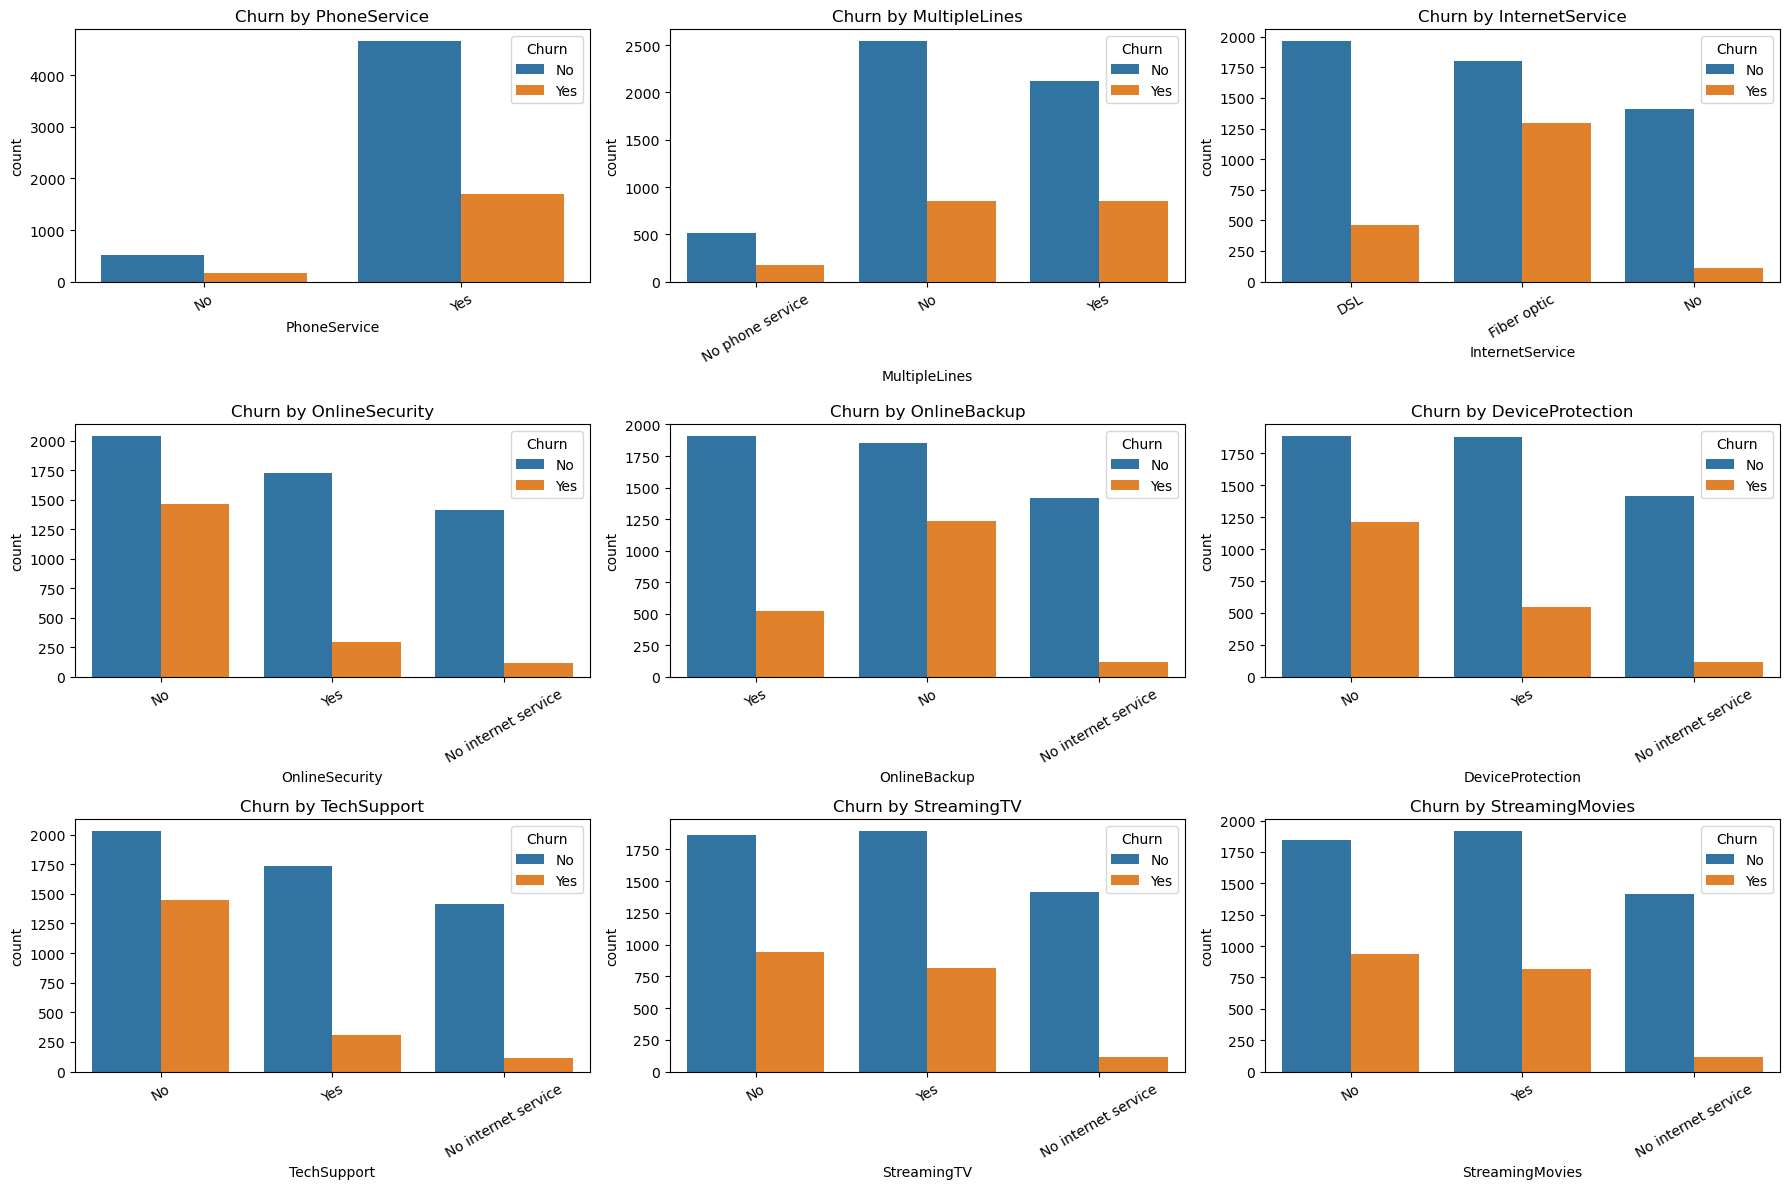

In [102]:
# List of service-related columns
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create subplots — adjust rows and columns based on number of features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # 3x3 grid
axes = axes.flatten()  # Flatten to 1D for easy looping

# Plot each column
for i, col in enumerate(service_cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x labels if needed

# Clean up layout
plt.tight_layout()
plt.show()


### Conclusion:
#### Support and protection services (OnlineSecurity, TechSupport, etc.) seem to reduce churn.
#### Fiber optic users may churn more — possibly due to dissatisfaction or pricing.
#### Customers without core services (phone/internet) rarely churn because they may not be active.

### Now see the effect of `PaymentMethod`

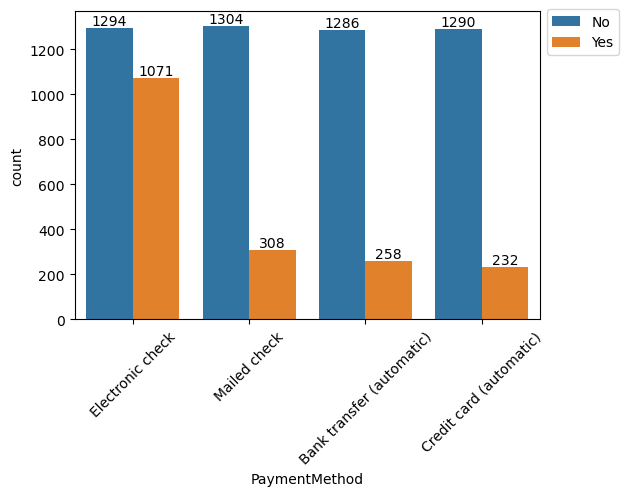

In [118]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1,1.03))
plt.show()

### Result -> People with `Electronic Check` are likely to churn

### Now with monthly charges.

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


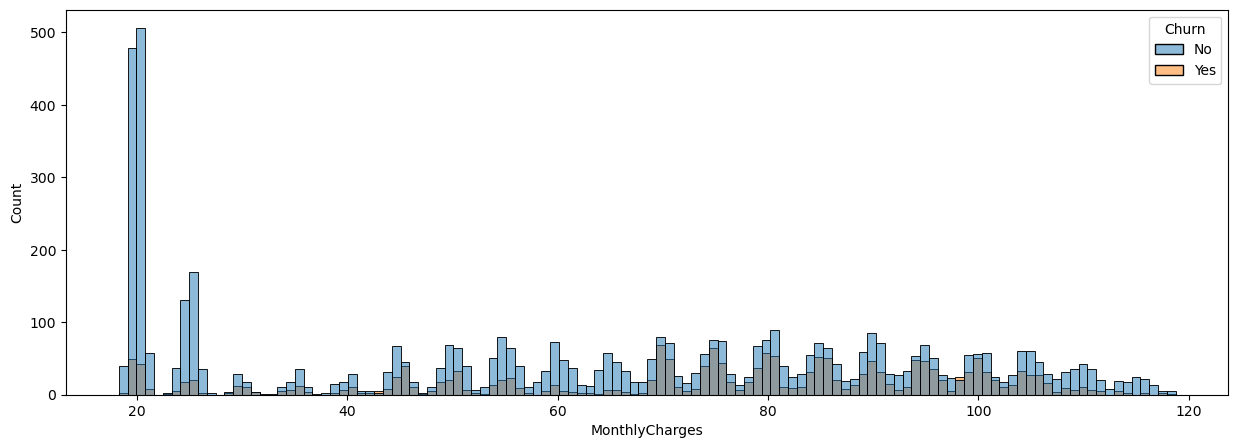

In [145]:
plt.figure(figsize = (15,5))
#sns.countplot(x = 'MonthlyCharges', data = df)
sns.histplot(x = 'MonthlyCharges', data = df, bins = 120, hue = 'Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

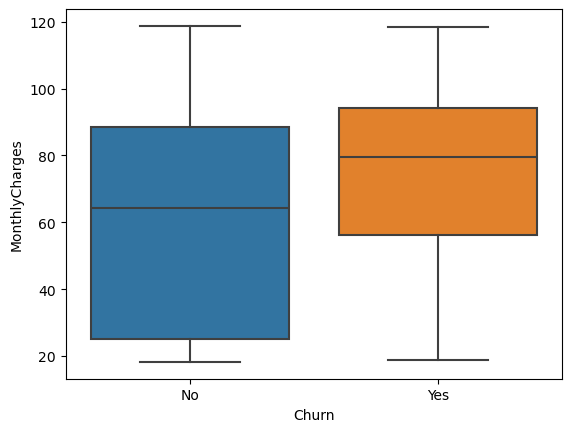

In [146]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)


### Result
People with monthly charges below 80 are not likely to churn but people with monthly charges in range 70-100 are most likely to churn.